# 참고 사이트
+ https://matplotlib.org
+ http://seaborn.pydata.org

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

## 1. plot() : 선그래프
+ df.plot()

<AxesSubplot:>

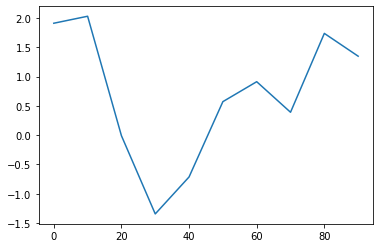

In [3]:
s = pd.Series(np.random.randn(10), index=np.arange(0, 100, 10))
s
# R에선 산점도가 기본. 파이썬에선 선그래프가 기본
# 언어마다 기본으롯 설정된 것이 다르다.
s.plot()


<AxesSubplot:>

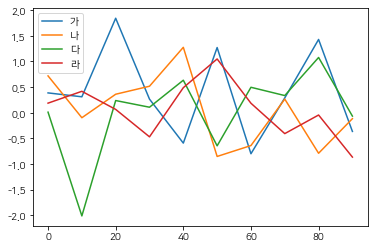

In [13]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=["가", "나", "다", "라"], index=np.arange(0,100,10))
df1

#데이터프레임은 시리즈의 결합
#데이터프레임에 그래프 붙이면 그 결합된 시리즈들을 그래프로 나타냄.
#즉, 칼럼별 그래프를 나타내는 것이라 보면 됨.
df1.plot()

# 폰트 지정을 해줘야 한글 칼럼명이 그래프에 나온다.
# import matplotlib.font_manager as fm
# font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
# plt.rc("font", family=font_name)

# -도 깨진다. 해결방법
# import matplotlib as mpl
# mpl.rcParams["axes.unicode_minus"] = False

## 2. 막대그래프
+ df.plot.bar
+ df.plot(kind="bar")
+ 빈도 확인할 때 사용
+ 주로 도수분포표
+ 원그래프, 파이그래프가 같은 역할읗 함

In [14]:
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2

a    0.929621
b    0.279309
c    0.013943
d    0.486387
e    0.077743
f    0.728272
g    0.416994
h    0.012040
i    0.641861
j    0.815250
k    0.297197
l    0.901897
m    0.471980
n    0.980059
o    0.230270
p    0.944037
dtype: float64

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x7ff288de3fd0>>

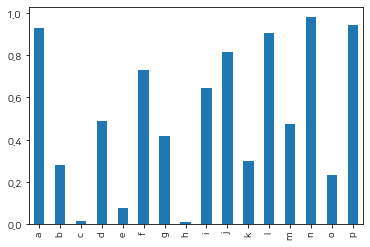

In [16]:
s2.plot(kind="bar")
s2.plot.bar()

# x축의 인덱스명들이 왼쪽으로 기울어져있다.
# 그래프 x축과 y축을 바꾸려면?
# df.plot.barh()

<bound method PlotAccessor.barh of <pandas.plotting._core.PlotAccessor object at 0x7ff288de3fd0>>

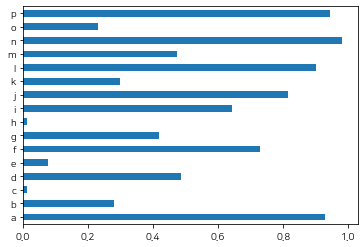

In [17]:
s2.plot(kind="barh")
s2.plot.barh()


In [19]:
df2 = pd.DataFrame(np.random.rand(6,4), index=["one", "two", "three", "four", "five", "six"], columns=["a", "b", "c", "d"])
df2

,a,b,c,d
one,0.945077,0.173960,0.590296,0.710362
two,0.564203,0.680808,0.019377,0.279580
three,0.991732,0.767094,0.990767,0.448298
four,0.954686,0.597008,0.580945,0.801360
five,0.272390,0.339449,0.413902,0.402523
six,0.977457,0.234455,0.576577,0.692400


<AxesSubplot:>

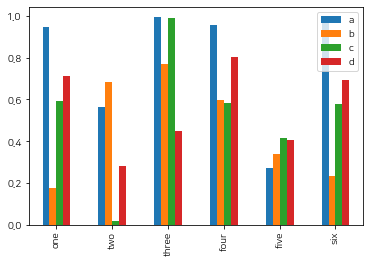

In [24]:
df2.plot.bar()

<AxesSubplot:>

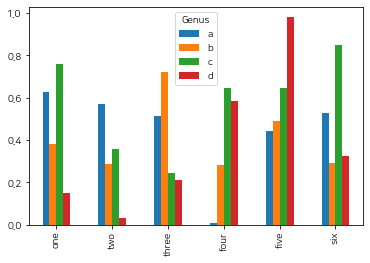

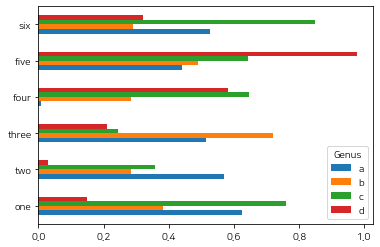

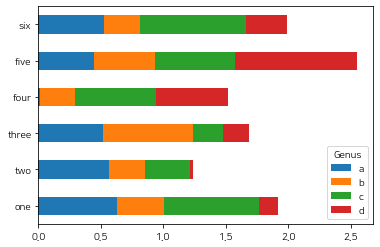

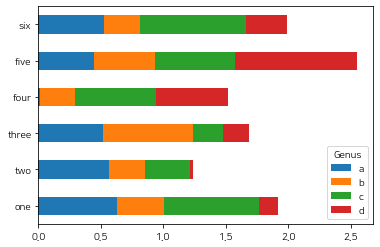

In [28]:
# 범례에 이름을 달아주고 싶다면?
# columns에 pd.Index(["a", "b", "c", "d"], name="Genus")를 던져준다.
df2 = pd.DataFrame(np.random.rand(6,4), index=["one", "two", "three", "four", "five", "six"], columns=pd.Index(["a", "b", "c", "d"], name="Genus"))
df2.plot.bar()
df2.plot.barh()

# 범례별로 떨어져있는 막대기를 쌓아올리고 싶으면? stacked = True 옵션을 넣어준다.
df2.plot.barh(stacked=True)
df2.plot(kind="barh", stacked=True)

## 3. 히스토그램
+ 
+ 양적 데이터에서 사용
+ X변수가 가질 수 있는 값의 범위

In [29]:
s = pd.Series(np.random.normal(0, 1, size=100))
s

0     0.715383
1    -0.024543
2     0.361623
3     0.871029
4    -0.312179
        ...   
95    1.883937
96    1.283706
97   -0.257985
98    0.013845
99    0.096168
Length: 100, dtype: float64

<AxesSubplot:>

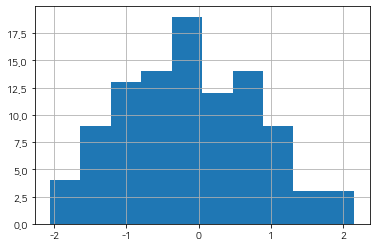

In [30]:
s.hist()

<AxesSubplot:>

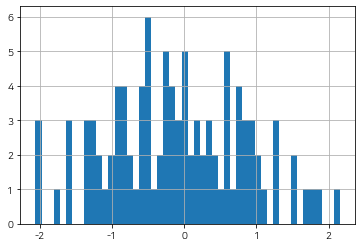

In [31]:
# 막대의 크기를 줄여서 값을 더 자세히 나타내고 싶다면?
s.hist(bins=50) # default값은 10

## 4. 산점도, 산포도, Scatter plot

+ df.plot.scatter("col1", "col2")
+ plt.scatter(df["col1"], df["col2"])
+ 두 변수의 관계를 파악할 때 사용
+ 이상치를 파악할 때도 사용
+ 상관관계, 인과관계 등 선형관계 파악에 유용

In [7]:
x1 = np.random.normal(1, 1, size=(100, 1))
x1

x2 = np.random.normal(-2, 4, size=(100, 1))
x2

# 시각화할 때, 데이터 형태는 pandas의 시리즈나 데이터프레임이 가장 좋다. 일단 시리즈나 데이터프레임으로 바꿀 생각을 하는게 좋음
# 1. 넘파이 배열 두 개 모두 2차원. 일단 합칩니다.

x = np.concatenate((x1, x2), axis=1)
x[:8]

array([[ 1.89118561,  6.27139673],
       [ 0.51649186,  1.05520345],
       [ 0.95497344,  3.95079235],
       [-1.14770358,  3.76741735],
       [ 1.36195731, -2.35701986],
       [ 1.18082556,  0.25600949],
       [ 1.93663609,  1.94722736],
       [-1.34119194,  1.69220271]])

In [10]:
df = pd.DataFrame(x, columns=["First", "Second"])
df

,First,Second
0,1.891186,6.271397
1,0.516492,1.055203
2,0.954973,3.950792
3,-1.147704,3.767417
4,1.361957,-2.357020
...,...,...
95,2.378322,-5.656785
96,1.915937,-1.084226
97,1.338028,-6.835430
98,1.689098,0.421686


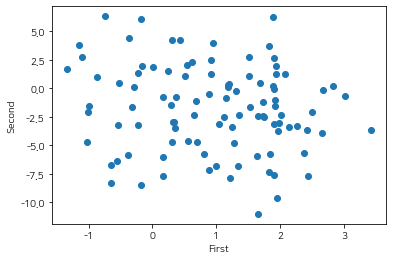

In [13]:
df.plot.scatter("First", "Second")
plt.scatter(df["First"], df["Second"])

## 5. 상자그래프
+ df.plot.box()

<AxesSubplot:>

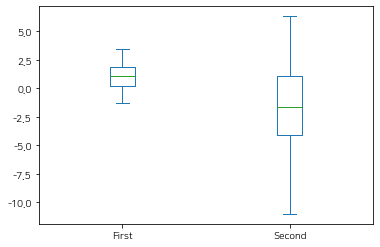

In [14]:
df.plot.box()

## 6. 실전예습

In [16]:
# 1. seaborn의 tips 샘플
# 종속변수를 total_bill로 결정

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0, 0.5, 'tips')

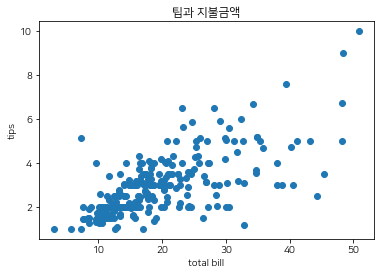

In [33]:
# 팁과 지불금액의 관계를 알고 싶다면?
# scatter plot

# tips.plot.scatter("total_bill", "tip") 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(tips["total_bill"], tips["tip"], group)
ax.set_title("팁과 지불금액")
ax.set_xlabel("total bill")
ax.set_ylabel("tips")

   total_bill   tip     sex smoker  day    time  size sex_color
0       16.99  1.01  Female     No  Sun  Dinner     2         0
1       10.34  1.66    Male     No  Sun  Dinner     3         1
2       21.01  3.50    Male     No  Sun  Dinner     3         1
3       23.68  3.31    Male     No  Sun  Dinner     2         1
4       24.59  3.61  Female     No  Sun  Dinner     4         0


Text(0, 0.5, 'tips')

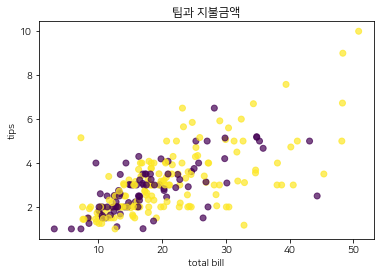

In [38]:
# 성별에 따른 팁과 지불금액의 관계를 알고 싶다.
# scatter plot // box plot

# 1. scatter : 성별은 점의 색상으로 구분
# sns에선 hue값으로 가능하나, 여기선 불가능. 일단 0과 1로 바꿔줘야
# 함수 만들고 apply 먹여서 성별을 0과 1로 구분하는 더미변수 칼럼 만들어 주기
def record_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

tips['sex_color'] = tips['sex'].apply(record_sex)
print(tips.head())

# 2. sex_color 던져주기
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(tips["total_bill"], tips["tip"], c = tips["sex_color"], alpha=0.7) # alpha는 투명도, c = sns의 hue와 같다.
ax.set_title("팁과 지불금액")
ax.set_xlabel("total bill")
ax.set_ylabel("tips")

   total_bill   tip     sex smoker  day    time  size sex_color
0       16.99  1.01  Female     No  Sun  Dinner     2         0
1       10.34  1.66    Male     No  Sun  Dinner     3         1
2       21.01  3.50    Male     No  Sun  Dinner     3         1
3       23.68  3.31    Male     No  Sun  Dinner     2         1
4       24.59  3.61  Female     No  Sun  Dinner     4         0


Text(0, 0.5, 'tips')

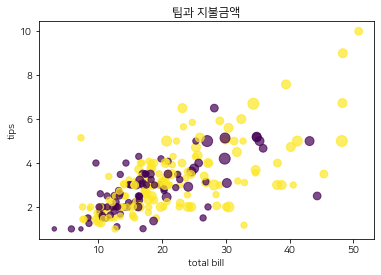

In [40]:
# 성별과 인원 수에 따른 팁과 지불금액의 관계에 대해

# 1. scatter : 성별은 점의 색상으로 구분 / 인원 수는 점의 크기로 구분
# sns에선 hue값으로 가능하나, 여기선 불가능. 일단 0과 1로 바꿔줘야
# 함수 만들고 apply 먹여서 성별을 0과 1로 구분하는 더미변수 칼럼 만들어 주기
def record_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

tips['sex_color'] = tips['sex'].apply(record_sex)
print(tips.head())

# 2. sex_color 던져주기
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(tips["total_bill"], tips["tip"], c = tips["sex_color"], alpha=0.7, s = tips['size'] * 20) # alpha는 투명도, c = sns의 hue와 같다. s는 점의 크기
ax.set_title("팁과 지불금액")
ax.set_xlabel("total bill")
ax.set_ylabel("tips")


# boxplot은 이런 복잡한 표현은 하기 힘들다.

Text(0, 0.5, 'tips')

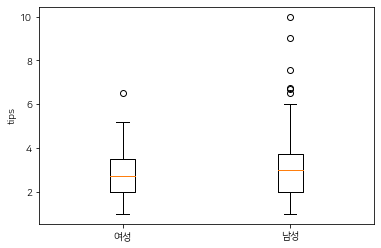

In [42]:
# 성별과 팁의 관계
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot([tips[tips['sex']=='Female']['tip'], tips[tips['sex']=='Male']['tip']], labels=["여성", "남성"])
ax.set_ylabel("tips")


Text(0, 0.5, 'total bill')

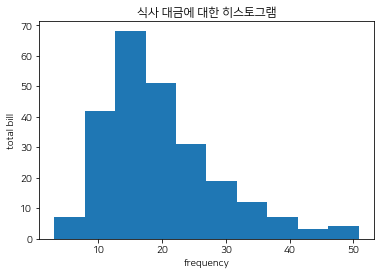

In [31]:
#tips['total_bill'].hist(bins=40)

fig = plt.figure() # 배경 만들기
ax = fig.add_subplot(1, 1, 1) #그래프를 몇개 그릴 것인가? (1행 1열 1번째) 0번째, 1번째, 2번째로 시작함
ax.hist(tips["total_bill"])
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("total bill")

## 7. 실전예습 2

In [86]:
apt = pd.read_csv("data/20200331.csv", encoding="euc-kr")
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [73]:
apt

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962
4588,제주,전용면적 85㎡초과 102㎡이하,2020,3,NaN


In [87]:
# 전처리 필요

# 1. columns를 영어로 변경 ['city', 'size', 'year', 'month', 'price']
# 2. 분양가격 object는 -> int로


# 1.
apt1 = apt
apt1.columns = ['city', 'size', 'year', 'month', 'price']




# 2.
# apt1.price = apt1.price.astype(float)
# error! could not convert string to float: ''
apt1['price'] = pd.to_numeric(apt1['price'].str.strip())
apt1.info()
 

# apt1.price = apt1.price.astype('str')

# def delete(x):
#     x = x.replace(" ", "")
#     return x

# apt1['price'] = apt1['price'].apply(delete)
# apt1.price = apt1.price.astype('float')

# print(apt1.price)

# apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4590 non-null   object 
 1   size    4590 non-null   object 
 2   year    4590 non-null   int64  
 3   month   4590 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 179.4+ KB


In [88]:
#### 서울만 선택해서 전체 사이즈 조회
apt_seoul = apt1[(apt1['city'] == '서울') & (apt1['size'] == '전체')]

In [76]:
#### 데이터베이스 내 조회만 전문적으로 해주는 함수가 있음
# 다만 속도 차이가 많이 난다. 매우 느림.
apt1.query('(city == "서울") and (size == "전체")')

,city,size,year,month,price
0,서울,전체,2015,10,5841.0
85,서울,전체,2015,11,6050.0
170,서울,전체,2015,12,6041.0
255,서울,전체,2016,1,6108.0
340,서울,전체,2016,2,6111.0
425,서울,전체,2016,3,6173.0
510,서울,전체,2016,4,6241.0
595,서울,전체,2016,5,6264.0
680,서울,전체,2016,6,6208.0
765,서울,전체,2016,7,6254.0


In [77]:
%%time
apt1[(apt1['city'] == '서울') & (apt1['size'] == '전체')]

CPU times: user 1.17 ms, sys: 38 µs, total: 1.21 ms
Wall time: 1.19 ms


,city,size,year,month,price
0,서울,전체,2015,10,5841.0
85,서울,전체,2015,11,6050.0
170,서울,전체,2015,12,6041.0
255,서울,전체,2016,1,6108.0
340,서울,전체,2016,2,6111.0
425,서울,전체,2016,3,6173.0
510,서울,전체,2016,4,6241.0
595,서울,전체,2016,5,6264.0
680,서울,전체,2016,6,6208.0
765,서울,전체,2016,7,6254.0


In [78]:
%%time
apt1.query('(city == "서울") and (size == "전체")')

CPU times: user 1.45 ms, sys: 46 µs, total: 1.49 ms
Wall time: 1.46 ms


,city,size,year,month,price
0,서울,전체,2015,10,5841.0
85,서울,전체,2015,11,6050.0
170,서울,전체,2015,12,6041.0
255,서울,전체,2016,1,6108.0
340,서울,전체,2016,2,6111.0
425,서울,전체,2016,3,6173.0
510,서울,전체,2016,4,6241.0
595,서울,전체,2016,5,6264.0
680,서울,전체,2016,6,6208.0
765,서울,전체,2016,7,6254.0


In [89]:
apt_graph = apt_seoul.drop(['city', 'size'], axis=1)

In [90]:
apt_graph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 4505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    54 non-null     int64  
 1   month   54 non-null     int64  
 2   price   54 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.7 KB


In [91]:
g = apt_graph.set_index(['year', 'month'])
print(g)

             price
year month        
2015 10     5841.0
     11     6050.0
     12     6041.0
2016 1      6108.0
     2      6111.0
     3      6173.0
     4      6241.0
     5      6264.0
     6      6208.0
     7      6254.0
     8      6285.0
     9      6283.0
     10     6400.0
     11     6370.0
     12     6443.0
2017 1      6450.0
     2      6464.0
     3      6370.0
     4      6366.0
     5      6400.0
     6      6667.0
     7      6573.0
     8      6172.0
     9      6507.0
     10     6578.0
     11     6657.0
     12     6706.0
2018 1      6623.0
     2      6631.0
     3      6836.0
     4      6841.0
     5      6919.0
     6      6694.0
     7      6820.0
     8      6731.0
     9      6994.0
     10     7378.0
     11     7369.0
     12     7398.0
2019 1      7600.0
     2      7627.0
     3      7772.0
     4      7784.0
     5      7786.0
     6      8100.0
     7      8067.0
     8      8093.0
     9      8085.0
     10     8091.0
     11     8062.0
     12     

<AxesSubplot:xlabel='year,month'>

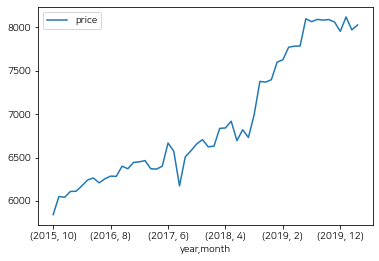

In [92]:
g.plot()